In [1]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.preprocessing import preprocesar_datos, guardar_datos_preprocesados

# 1. Carga de datos
print('Cargando datos...')
df = pd.read_csv('demanda_producto.csv', sep=';') # raw data

Cargando datos...


In [2]:
# 2. Información básica del dataset
print("=== Información básica del dataset ===")
df.info()

=== Información básica del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95060 entries, 0 to 95059
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Product_Category   95060 non-null  object
 1   Subcategory        95060 non-null  object
 2   Material_Category  95060 non-null  object
 3   Material_Type      95060 non-null  object
 4   Thickness          95060 non-null  object
 5   Waterproof_Rating  95060 non-null  object
 6   Thermal_Rating     95060 non-null  object
 7   Color_Family       95060 non-null  object
 8   Pattern            95060 non-null  object
 9   Style              95060 non-null  object
 10  Season             95060 non-null  object
dtypes: object(11)
memory usage: 8.0+ MB


In [3]:
# 3. Visualización de las primeras filas
print("=== Primeras 5 filas ===")
df.head()

=== Primeras 5 filas ===


,Product_Category,Subcategory,Material_Category,Material_Type,Thickness,Waterproof_Rating,Thermal_Rating,Color_Family,Pattern,Style,Season
0,Bottoms,Pantalones,Técnico,Dri-FIT,Medio,No,Alto,Oscuro,Sólido,Formal,Winter
1,Tops,Sudaderas,Natural,Algodón,Ligero,Repelente,Bajo,Vibrante,Estampado,Deportivo,Summer
2,Dresses,Vestidos Formal,Natural,Algodón,Ligero,No,Bajo,Neutro,Estampado,Playa,Summer
3,Outerwear,Chaquetas,Técnico,Gore-Tex,Grueso,Impermeable,Muy Alto,Oscuro,Sólido,Casual,Winter
4,Bottoms,Faldas,Natural,Algodón,Medio,No,Bajo,Pastel,Rayas,Casual,Spring


In [4]:
# 4. Análisis de valores nulos
print("=== Análisis de valores nulos ===")
nulos = df.isnull().sum()
nulos[nulos > 0]

=== Análisis de valores nulos ===


Series([], dtype: int64)

In [5]:
# 5. Estadísticas descriptivas
print("=== Estadísticas descriptivas ===")
df.describe()

=== Estadísticas descriptivas ===


,Product_Category,Subcategory,Material_Category,Material_Type,Thickness,Waterproof_Rating,Thermal_Rating,Color_Family,Pattern,Style,Season
count,95060,95060,95060,95060,95060,95060,95060,95060,95060,95060,95060
unique,7,25,3,10,3,3,4,4,5,4,4
top,Bottoms,Vestidos Playa,Natural,Algodón,Medio,No,Bajo,Neutro,Sólido,Formal,Winter
freq,14755,6125,38006,13742,39496,46247,36068,26128,26203,26294,23765


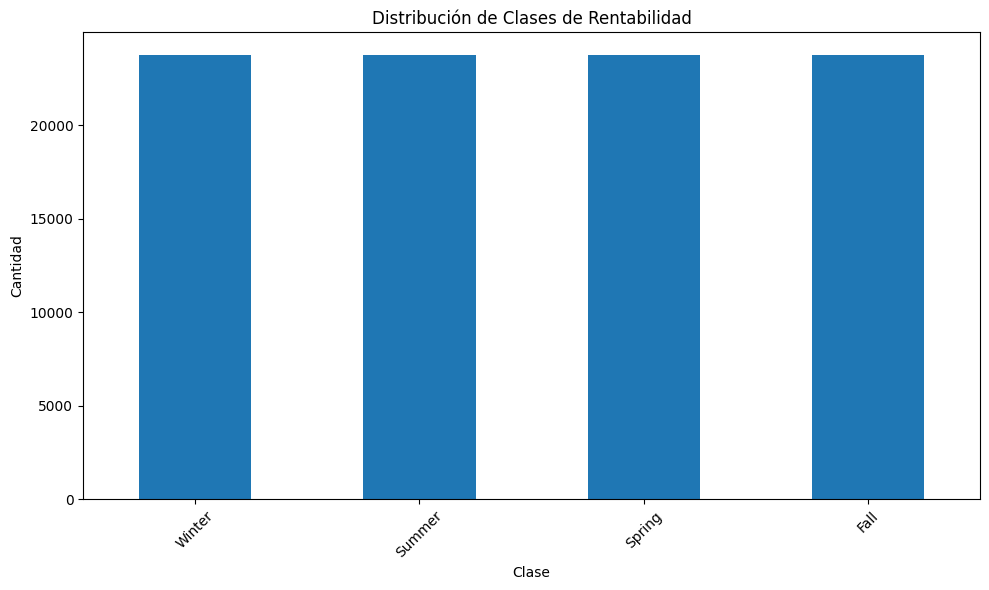

In [6]:
# 6. Visualización de la distribución de clases
plt.figure(figsize=(10, 6))
df['Season'].value_counts().plot(kind='bar')
plt.title('Distribución de Clases de Rentabilidad')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# 7. Matriz de correlación
# numerical_cols = df.select_dtypes(include=[np.number]).columns
# plt.figure(figsize=(12, 8))
# sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
# plt.title('Matriz de Correlación - Variables Numéricas')
# plt.tight_layout()
# plt.show()

In [8]:
# 8. Preprocesamiento de datos
print("=== Realizando preprocesamiento ===")
resultados = preprocesar_datos(df)

=== Realizando preprocesamiento ===

=== Iniciando preprocesamiento de datos ===

Información inicial del dataset:
Dimensiones: (95060, 11)

Distribución inicial de temporadas:
Season
Winter    23765
Summer    23765
Spring    23765
Fall      23765
Name: count, dtype: int64

Tratamiento de valores nulos...

Aplicando encoding a variables categóricas...
Label encoding aplicado a: Product_Category
Label encoding aplicado a: Subcategory
Label encoding aplicado a: Material_Category
Label encoding aplicado a: Material_Type
Label encoding aplicado a: Waterproof_Rating
Label encoding aplicado a: Thermal_Rating
Label encoding aplicado a: Color_Family
Label encoding aplicado a: Pattern
Label encoding aplicado a: Style
One-hot encoding aplicado a: Thickness

Separando features y target...

Aplicando escalamiento a variables numéricas...
Escalamiento aplicado a: 12 columnas

Codificando variable objetivo...
Mapeo de temporadas: {'Fall': np.int64(0), 'Spring': np.int64(1), 'Summer': np.int64(2), 'W

In [9]:
# 9. Verificación del preprocesamiento - Distribución de clases
print("=== Distribución de clases en el conjunto de entrenamiento ===")
clases_unicas, conteos = np.unique(resultados['y_train'], return_counts=True)
for clase, conteo in zip(clases_unicas, conteos):
    print(f"Clase {clase}: {conteo} muestras")

=== Distribución de clases en el conjunto de entrenamiento ===
Clase 0: 16805 muestras
Clase 1: 17016 muestras
Clase 2: 18209 muestras
Clase 3: 17986 muestras


In [10]:
# 10. Verificación del preprocesamiento - Formas de los conjuntos
print("=== Formas de los conjuntos de datos ===")
print(f"X_train: {resultados['X_train'].shape}")
print(f"X_test: {resultados['X_test'].shape}")
print(f"y_train: {resultados['y_train'].shape}")
print(f"y_test: {resultados['y_test'].shape}")

=== Formas de los conjuntos de datos ===
X_train: (70016, 12)
X_test: (19012, 12)
y_train: (70016,)
y_test: (19012,)


In [11]:
# 11. Verificación del preprocesamiento - Rango de valores
print("=== Rango de valores después del escalamiento (X_train) ===")
for columna in resultados['X_train'].columns:
    min_val = resultados['X_train'][columna].min()
    max_val = resultados['X_train'][columna].max()
    print(f"{columna}: [{min_val:.2f}, {max_val:.2f}]")

=== Rango de valores después del escalamiento (X_train) ===
Product_Category: [-0.75, 0.75]
Subcategory: [-1.00, 0.85]
Material_Category: [-0.50, 0.50]
Material_Type: [-1.00, 1.25]
Waterproof_Rating: [-1.00, 1.00]
Thermal_Rating: [-1.00, 2.00]
Color_Family: [-0.33, 0.67]
Pattern: [-0.67, 0.67]
Style: [-0.50, 1.00]
Thickness_Grueso: [0.00, 1.00]
Thickness_Ligero: [0.00, 1.00]
Thickness_Medio: [0.00, 1.00]


In [12]:
# 12. Guardar datos preprocesados
print("=== Guardando datos preprocesados ===")
guardar_datos_preprocesados(resultados)
print("¡Proceso completado con éxito!")

=== Guardando datos preprocesados ===
Guardando datos principales...
Guardando encoders...
Guardando archivos CSV...
Guardado completado exitosamente en: c:\Users\patri\Documents\workspaces\python\PROYECT-BI\datos

Archivos guardados:
- preprocessors.pkl
- test_processed.csv
- train_processed.csv
- X_test.npy
- X_train.npy
- y_test.npy
- y_train.npy
¡Proceso completado con éxito!
